# Telco Customer Churn 

## Part 1 
### Data Cleaning 
- [Cleaning](#cleaning) 

## Part 2
### Exploratory Analysis 
- [Exploratory Analysis](#explo)

For EDA, I do some very simple exploratory analysis to try and pull out interesting factors that may be affecting customer churn. 



## Part 3
- [Machine Learning](#ml)

I then fit a decision tree classifier and a random forest classifier to classify the data with highest possible accuracy without overfitting (maintaing a good bias variance tradeoff !)


   - Decision Tree Classifier 
   - Random Forest Classifier
   - Logistic Regression  


## Recommendation

### Demographic 
- One thing I noted is that individuals without partners/dependents are more likely to leave the company. In my opinion, individuals 'with' partners and dependents are more likely  to remain as most telecom companies offer special deals for families, couples etc.. As a recommendation, I would recommend the telecom company to maybe have a special promotion/marketing campaign targeted towards individuals without partners/dependents. 


### Service-Specific
- Based off the feature importances and the EDA, I can conclude that the company needs to relaunch/remodel their FiberOptic Service. 


- On the other hand, a lot of customers that are leaving the company seem to also not be registered for any support-like services (security, protection etc..) I would recommend the company to start offering these as bundles with services as customers who are signed up for these security-like services are more likely to remain with the company. (or make it mandatory to have these or just make them included) 

### Payment-Specific
- No recommendations 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('telco.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The dataset is very clean, there are no null values. Here, I replaced the binary outcome variable from Yes and No into 1 and 0. 

<a id='cleaning' ></a>

### Cleaning 

In [3]:
print(df.isnull().sum())
df['Churn'].replace('Yes',1,inplace=True)
df['Churn'].replace('No',0,inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Farther down, I ran into an issue with the Total Charges Column as highlighted below. In the next few cells, I just adjust this column by removing these empty strings and reformatting the column to a numeric type

In [4]:
#There is an issue with the Total Charges colummns (the data is stored as a string)
print(' The data type for the Total Charges Column is:',type(df['TotalCharges'].loc[4]))
#While attempting to convert this to a numeric type, ran into another problem at some positions,empty strings
print(df['TotalCharges'][(df['TotalCharges'] == ' ')])


 The data type for the Total Charges Column is: <class 'str'>
488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object


In [5]:
# Drop rows where there is no value for Total Charges 
index = [488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]
for i in index: 
    df.drop(i,axis=0,inplace=True)

In [6]:
# Convert from str to float
df['TotalCharges'].apply(float)


0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
6       1949.40
7        301.90
8       3046.05
9       3487.95
10       587.45
11       326.80
12      5681.10
13      5036.30
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19      1862.90
20        39.65
21       202.25
22        20.15
23      3505.10
24      2970.30
25      1530.60
26      4749.15
27        30.20
28      6369.45
29      1093.10
         ...   
7013    3756.40
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019     826.00
7020     239.00
7021     727.80
7022    7544.30
7023    6479.40
7024    3626.35
7025    1679.40
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031    3316.10
7032      75.75
7033    2625.25
7034    6886.25
7035    1495.10
7036     743.30
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Leng

<a id='explo' ></a>


### Exploratory Analysis

- For my EDA, I split up the data into 3 categories. The first categroy is demographic which contains features like gender, partner etc.. 

   #### Demographic
Few things that stood out that seem to be quite different at the demographic level: 
- Number of Senior Citizens 
- Number of Individuals with Dependents 

In terms of churn, one interesting thing stands out, is that although the distribution of individuals with partners is equal, individuals without a partner are more likely to leave the company while individuals with a partner are more likely to remain as customers. This is a factor that is out of the company's control



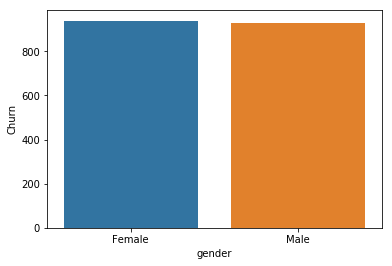

   gender  customerID
0  Female        3483
1    Male        3549


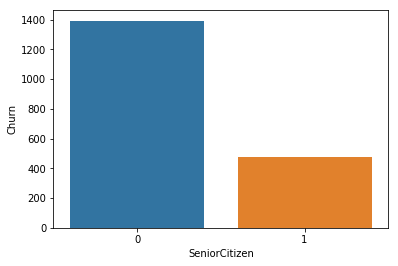

   SeniorCitizen  customerID
0              0        5890
1              1        1142


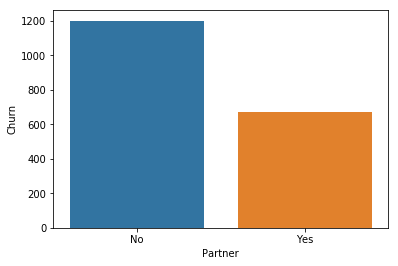

  Partner  customerID
0      No        3639
1     Yes        3393


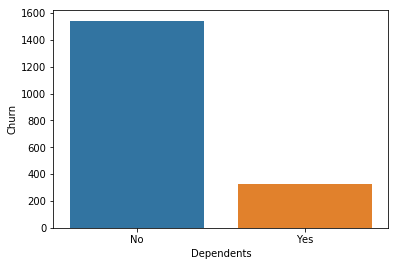

  Dependents  customerID
0         No        4933
1        Yes        2099


In [7]:
# Inspecting frequency in the different demographic variables that are not related to the service
dem = ['gender','SeniorCitizen','Partner','Dependents']

for i in dem: 
    sns.barplot(x = df.groupby(str(i))['Churn'].sum().reset_index()[str(i)]\
                , y = df.groupby(str(i))['Churn'].sum().reset_index()['Churn'],)
    plt.show()
    print(df.groupby(str(i))['customerID'].count().reset_index())


 #### Service-Specific 

- One thing that stood out may seem to uncover a service that may be causing high churn rates. Looking at the Internet Service, it seems that people with Fiber Optic service are more likely to leave the company. Although individuals with fiber optic services make up a large proportion of internet service customers, DSL customers have a much lower churn rate and make up almost the same number of individuals/customers.
   - Proportion of individuals with DSL leaving the company 459/2416 * 100 = 19%
   - Proportion of individuals with Fiber Optic leaving the company 1297/3096 * 100 = 42%
 
 
- OnlineSecurity seems to be another factor causing high churn rates 
  - Proportion of individuals with Online Security leaving the company = 295/3497 *100 = 8.4%
  - Proportion of individuals without Online Security leaving the company = 1461/2015*100= 73%
  
  
- OnlineBackup,Device Protection and Tech Support also follow the same pattern as online security where individuals without these services are more likely to leave the company. 



##### Streaming Services 
  - More than 40% of individuals with streaming TV and streaming movies service are also unsubscribing which may indicate that the streaming services could also be improved

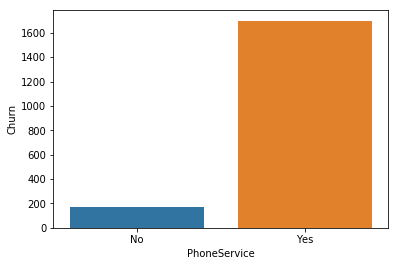

  PhoneService  customerID
0           No         680
1          Yes        6352


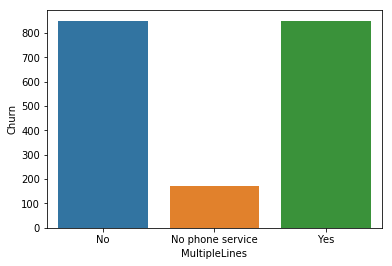

      MultipleLines  customerID
0                No        3385
1  No phone service         680
2               Yes        2967


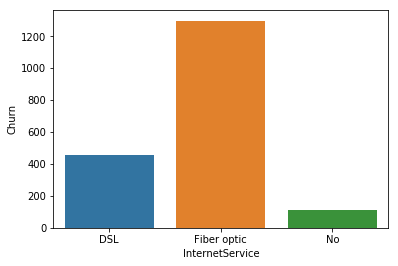

  InternetService  customerID
0             DSL        2416
1     Fiber optic        3096
2              No        1520


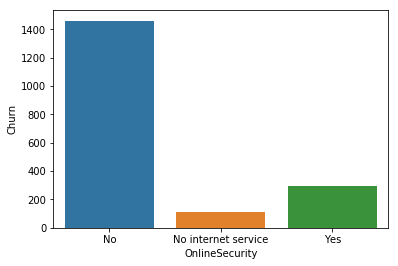

        OnlineSecurity  customerID
0                   No        3497
1  No internet service        1520
2                  Yes        2015


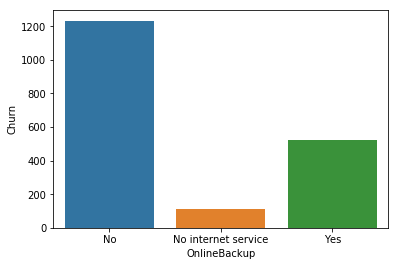

          OnlineBackup  customerID
0                   No        3087
1  No internet service        1520
2                  Yes        2425


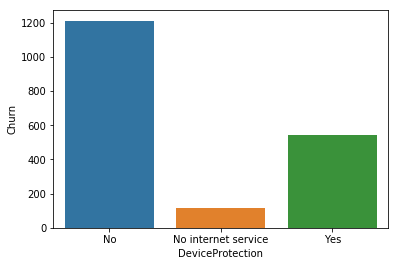

      DeviceProtection  customerID
0                   No        3094
1  No internet service        1520
2                  Yes        2418


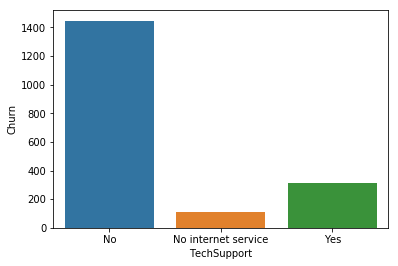

           TechSupport  customerID
0                   No        3472
1  No internet service        1520
2                  Yes        2040


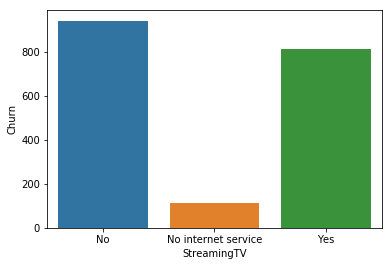

           StreamingTV  customerID
0                   No        2809
1  No internet service        1520
2                  Yes        2703


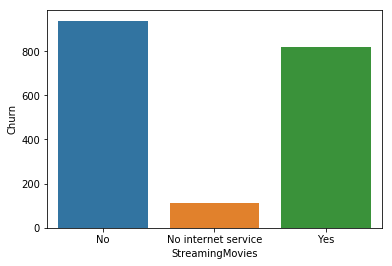

       StreamingMovies  customerID
0                   No        2781
1  No internet service        1520
2                  Yes        2731


In [8]:
cat = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for i in cat: 
    sns.barplot(x = df.groupby(str(i))['Churn'].sum().reset_index()[str(i)]\
                , y = df.groupby(str(i))['Churn'].sum().reset_index()['Churn'],)
    plt.show()
    print(df.groupby(str(i))['customerID'].count().reset_index())
    

#### Payment-Specific 
   - One thing that stood out was that the majority of customers pay for Telco services on a month to month contract basis. 



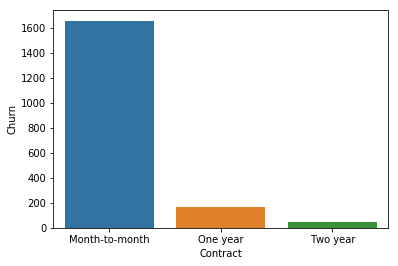

         Contract  customerID
0  Month-to-month        3875
1        One year        1472
2        Two year        1685


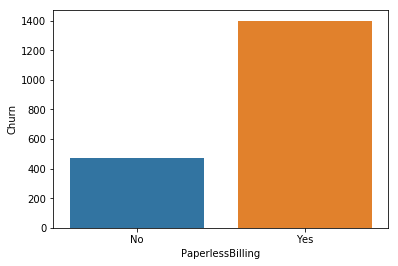

  PaperlessBilling  customerID
0               No        2864
1              Yes        4168


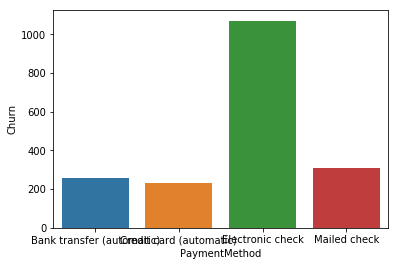

               PaymentMethod  customerID
0  Bank transfer (automatic)        1542
1    Credit card (automatic)        1521
2           Electronic check        2365
3               Mailed check        1604


In [9]:
pay = ['Contract','PaperlessBilling','PaymentMethod']

for i in pay: 
    sns.barplot(x = df.groupby(str(i))['Churn'].sum().reset_index()[str(i)]\
                , y = df.groupby(str(i))['Churn'].sum().reset_index()['Churn'])
    plt.show()
    print(df.groupby(str(i))['customerID'].count().reset_index())



<a id='ml' ></a>

<a id='ml' ></a>

### Machine Learning
- Start off converting variables to their appropriate format. Convert Binary Variables to 1 for Yes and 0 for no. For variables with more than 2 categories I used pd.get_dummies.

In [10]:
# Convert Binary Categories to 0's and 1's
df['Partner'].replace('Yes',1,inplace=True)
df['Partner'].replace('No',0,inplace=True)
df['Dependents'].replace('Yes',1,inplace=True)
df['Dependents'].replace('No',0,inplace=True)
df['gender'].replace('Male',1,inplace=True)
df['gender'].replace('Female',0,inplace=True)
df['PhoneService'].replace('Yes',1,inplace=True)
df['PhoneService'].replace('No',0,inplace=True)
df['PaperlessBilling'].replace('Yes',1,inplace=True)
df['PaperlessBilling'].replace('No',0,inplace=True)


In [11]:
## Prepare Categorical Variables with more than 2 categories
cat_X = df[['MultipleLines','InternetService','OnlineSecurity','OnlineBackup',\
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',\
           'Contract','PaymentMethod']]
# Dummy Categorical Variables 
for i in cat_X: 
    cat_X = pd.concat([cat_X,pd.get_dummies(cat_X[str(i)],\
                                            drop_first=True,prefix=str(i))],axis=1)


cat_X = cat_X.drop(columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup',\
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',\
           'Contract','PaymentMethod'])


In [12]:
features = pd.concat([df[['tenure','Partner','Dependents','gender','PhoneService',\
                          'PaperlessBilling','MonthlyCharges','TotalCharges']],cat_X],axis=1)


The first tree is just a proof of concept to get an idea of which features really minimize confusion during the learning process for the tree (gini impurity). 
   
   - Tenure and Fiber Optic Services seem to be really important features to classify whether a customer will leave or remain. 

### Decision Tree Classifier

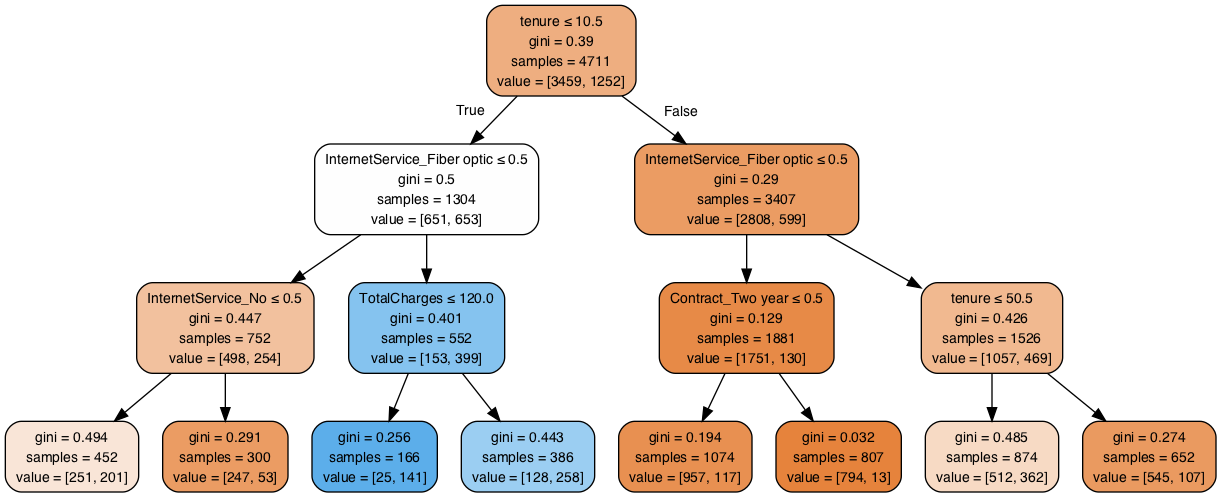

In [13]:
# Used stratified split as the classes are imbalanced
X=features
y= df['Churn']
X_train, X_test, y_train, y_test = train_test_split(features, df['Churn'], \
                                                    test_size=0.33, random_state=42,stratify=y)
my_DT = tree.DecisionTreeClassifier(max_depth=3)
my_DT.fit(X_train, y_train)
dot_data = StringIO()
export_graphviz(my_DT, out_file=dot_data,feature_names=features.columns,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


Cross-Validation to find optimal value for the max_depth

In [14]:
X = features
y = df['Churn']
depth_range = np.arange(1,50,1)
val_scores = []
for d in depth_range:
    my_DT = tree.DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(my_DT, X, y, cv=10, scoring='accuracy')
    val_scores.append(scores.mean())
print(val_scores)


[0.73421506653414548, 0.78924932132168968, 0.78924932132168968, 0.78839644242604767, 0.78782886907886918, 0.78939156710538294, 0.78014749601920652, 0.77929744878758034, 0.76891681200891715, 0.76735107623265519, 0.75796111947427736, 0.75156260534550012, 0.74345833284978025, 0.73706022628719992, 0.73947701842438684, 0.73279319932280473, 0.72966273805089599, 0.73321994185481032, 0.73023153006705643, 0.72994581522542057, 0.72867145646750919, 0.72824167618575519, 0.7282410734713366, 0.72610816270355749, 0.72937945824458983, 0.72923741163872746, 0.73080152866337078, 0.72923802183670605, 0.72966617991289051, 0.72866700259792361, 0.72810003426779735, 0.7252532643980012, 0.72696023970695023, 0.73037357552160187, 0.72596409841475629, 0.72824369847396164, 0.72511708432761057, 0.72653855030499781, 0.72696145089237196, 0.72596834389597553, 0.72497018607215968, 0.72753266873332656, 0.7296643591051486, 0.72909354767907408, 0.7279594089626984, 0.72909577144774507, 0.72881309723414989, 0.72753185417659

Text(0,0.5,'Cross-Validated Accuracy Scores')

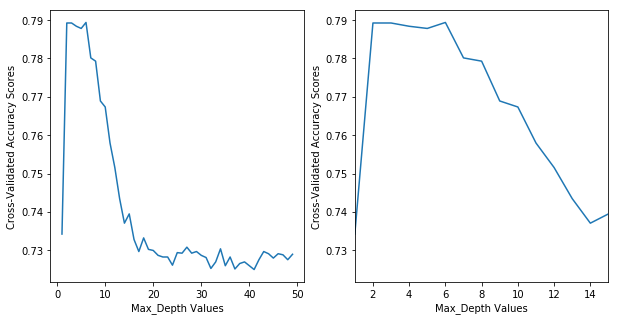

In [15]:
#Plot results from cross-validation
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,5))
ax1.plot(depth_range, val_scores)
ax1.set_xlabel('Max_Depth Values')
ax1.set_ylabel('Cross-Validated Accuracy Scores')

# A more zoomed in version of the first plot
ax2.plot(depth_range,val_scores)
ax2.set_xlim(1,15)
ax2.set_xlabel('Max_Depth Values')
ax2.set_ylabel('Cross-Validated Accuracy Scores')



Decision Tree with Optimized Hyperparameters

In [16]:
my_DT = tree.DecisionTreeClassifier(max_depth=3)
my_DT.fit(X_train,y_train)
print(my_DT.score(X_train,y_train))
print(my_DT.score(X_test,y_test))


0.786457227765
0.781559672555


In [17]:
# What are the 10 most important features for classification ? 
imp = pd.DataFrame(my_DT.feature_importances_).sort_values(by=0,ascending=False).\
head(10).index.values
imp_vals = pd.DataFrame(my_DT.feature_importances_).sort_values(by=0,ascending=False).\
head(10)

for i,j in zip(imp,imp_vals[0]):
    print(features.columns[i],j)
    

tenure 0.5150705587106872
InternetService_Fiber optic 0.39808657870665376
OnlineSecurity_No internet service 0.054272656190556816
Contract_Two year 0.016636203265093293
TotalCharges 0.015934003127008912
DeviceProtection_No internet service 0.0
PaymentMethod_Electronic check 0.0
PaymentMethod_Credit card (automatic) 0.0
Contract_One year 0.0
StreamingMovies_Yes 0.0


#### Confusion Matrix Decision Tree Classifier
  - The x axis shows the predicted values and the y axis show the true class values. On the top right we have the "false positives" which are the X values that are actually 0s but were classified (predicted) as 1s. On the bottom left we have the "false negatives" which are values that are actually 1s (churn) but were classified (predicted) as 0s.   
  
  - The F1 score shown above the confusion matrix represents the harmonic mean of precision and recall. It receives equal contribution from precision and recall, hence the higher the score (closer to 1) the better the model is at classifying. 

0.43853820598


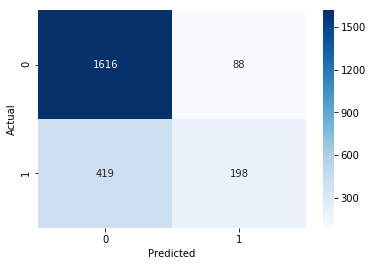

In [19]:
y_pred = my_DT.predict(X_test)
def cm(pred):
    cm = confusion_matrix(y_test, pred)
    fig = plt.plot(figsize=(8,5))
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f1_score(y_test,pred))
    return plt.show()
cm(y_pred)


#### ROC-AUC Decision Tree Classifier
 - The red line (random predictor) is used as a baseline to see whether the model is useful.
 - The blue line demonstrates the TPR and FPR at varying thresholds. 
 - The greater the Area under the Curve (AUC), the better the model is at classifying. 

In [44]:
def roc_auc(prediction,model):
    fpr, tpr, thresholds = metrics.roc_curve(y_test,prediction)
    auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic '+str(model))
    plt.plot(fpr, tpr, color='blue', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'--',color='red')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

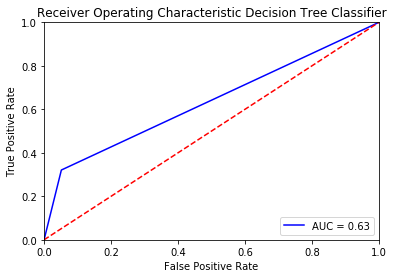

In [45]:
roc_auc(y_pred,'Decision Tree Classifier')

### Random Forest Regressor 

In [22]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

0.980683506686
0.769926755709


In [23]:
# Number of trees in random forest
n_estimators = np.arange(10,1000,10)
# Number of features to consider at every split
# Maximum number of levels in tree
max_depth = np.arange(1,25,2)
# Minimum number of samples required to split a node
min_samples_split = [2,4,8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)




Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=550, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_depth=11 
[CV] n_estimators=550, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_depth=11 
[CV] n_estimators=550, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_depth=11 
[CV] n_estimators=690, min_samples_split=8, min_samples_leaf=4, bootstrap=True, max_depth=1 
[CV]  n_estimators=690, min_samples_split=8, min_samples_leaf=4, bootstrap=True, max_depth=1, total=   2.7s
[CV] n_estimators=690, min_samples_split=8, min_samples_leaf=4, bootstrap=True, max_depth=1 
[CV]  n_estimators=550, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_depth=11, total=   4.0s
[CV] n_estimators=690, min_samples_split=8, min_samples_leaf=4, bootstrap=True, max_depth=1 
[CV]  n_estimators=550, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_depth=11, total=   3.9s
[CV] n_estimators=450, min_samples_split=2, m

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.8s


[CV]  n_estimators=30, min_samples_split=8, min_samples_leaf=4, bootstrap=True, max_depth=3, total=   0.1s
[CV] n_estimators=30, min_samples_split=8, min_samples_leaf=4, bootstrap=True, max_depth=3 
[CV]  n_estimators=30, min_samples_split=8, min_samples_leaf=4, bootstrap=True, max_depth=3, total=   0.1s
[CV] n_estimators=770, min_samples_split=4, min_samples_leaf=4, bootstrap=True, max_depth=1 
[CV]  n_estimators=850, min_samples_split=8, min_samples_leaf=4, bootstrap=False, max_depth=11, total=   6.5s
[CV]  n_estimators=850, min_samples_split=8, min_samples_leaf=4, bootstrap=False, max_depth=11, total=   6.6s
[CV] n_estimators=770, min_samples_split=4, min_samples_leaf=4, bootstrap=True, max_depth=1 
[CV] n_estimators=770, min_samples_split=4, min_samples_leaf=4, bootstrap=True, max_depth=1 
[CV]  n_estimators=850, min_samples_split=8, min_samples_leaf=4, bootstrap=False, max_depth=11, total=   6.5s
[CV] n_estimators=580, min_samples_split=2, min_samples_leaf=4, bootstrap=True, max_d

[CV] n_estimators=910, min_samples_split=4, min_samples_leaf=1, bootstrap=True, max_depth=1 
[CV]  n_estimators=750, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_depth=7, total=   3.7s
[CV] n_estimators=910, min_samples_split=4, min_samples_leaf=1, bootstrap=True, max_depth=1 
[CV]  n_estimators=910, min_samples_split=4, min_samples_leaf=1, bootstrap=True, max_depth=1, total=   3.2s
[CV] n_estimators=910, min_samples_split=4, min_samples_leaf=1, bootstrap=True, max_depth=1 
[CV]  n_estimators=750, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_depth=7, total=   3.9s
[CV] n_estimators=120, min_samples_split=4, min_samples_leaf=2, bootstrap=False, max_depth=19 
[CV]  n_estimators=750, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_depth=7, total=   3.8s
[CV] n_estimators=120, min_samples_split=4, min_samples_leaf=2, bootstrap=False, max_depth=19 
[CV]  n_estimators=120, min_samples_split=4, min_samples_leaf=2, bootstrap=False, max_depth=19, tot

[CV]  n_estimators=350, min_samples_split=8, min_samples_leaf=4, bootstrap=True, max_depth=23, total=   1.8s
[CV] n_estimators=810, min_samples_split=4, min_samples_leaf=4, bootstrap=True, max_depth=19 
[CV]  n_estimators=350, min_samples_split=8, min_samples_leaf=4, bootstrap=True, max_depth=23, total=   2.0s
[CV] n_estimators=620, min_samples_split=4, min_samples_leaf=4, bootstrap=True, max_depth=23 
[CV]  n_estimators=810, min_samples_split=4, min_samples_leaf=4, bootstrap=True, max_depth=19, total=   4.1s
[CV] n_estimators=620, min_samples_split=4, min_samples_leaf=4, bootstrap=True, max_depth=23 
[CV]  n_estimators=810, min_samples_split=4, min_samples_leaf=4, bootstrap=True, max_depth=19, total=   4.2s
[CV] n_estimators=620, min_samples_split=4, min_samples_leaf=4, bootstrap=True, max_depth=23 
[CV]  n_estimators=620, min_samples_split=4, min_samples_leaf=4, bootstrap=True, max_depth=23, total=   3.2s
[CV] n_estimators=570, min_samples_split=4, min_samples_leaf=2, bootstrap=True,

[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, bootstrap=True, max_depth=3, total=   0.1s
[CV] n_estimators=830, min_samples_split=2, min_samples_leaf=2, bootstrap=True, max_depth=9 
[CV] n_estimators=830, min_samples_split=2, min_samples_leaf=2, bootstrap=True, max_depth=9 


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min


[CV]  n_estimators=840, min_samples_split=4, min_samples_leaf=2, bootstrap=True, max_depth=7, total=   3.9s
[CV] n_estimators=830, min_samples_split=2, min_samples_leaf=2, bootstrap=True, max_depth=9 
[CV]  n_estimators=840, min_samples_split=4, min_samples_leaf=2, bootstrap=True, max_depth=7, total=   3.9s
[CV] n_estimators=540, min_samples_split=4, min_samples_leaf=4, bootstrap=False, max_depth=19 
[CV]  n_estimators=830, min_samples_split=2, min_samples_leaf=2, bootstrap=True, max_depth=9, total=   5.0s
[CV] n_estimators=540, min_samples_split=4, min_samples_leaf=4, bootstrap=False, max_depth=19 
[CV]  n_estimators=830, min_samples_split=2, min_samples_leaf=2, bootstrap=True, max_depth=9, total=   5.0s
[CV] n_estimators=540, min_samples_split=4, min_samples_leaf=4, bootstrap=False, max_depth=19 
[CV]  n_estimators=540, min_samples_split=4, min_samples_leaf=4, bootstrap=False, max_depth=19, total=   5.6s
[CV] n_estimators=320, min_samples_split=4, min_samples_leaf=1, bootstrap=True, 

[CV] n_estimators=60, min_samples_split=4, min_samples_leaf=1, bootstrap=True, max_depth=3 
[CV]  n_estimators=60, min_samples_split=4, min_samples_leaf=1, bootstrap=True, max_depth=3, total=   0.2s
[CV] n_estimators=60, min_samples_split=4, min_samples_leaf=1, bootstrap=True, max_depth=3 
[CV]  n_estimators=410, min_samples_split=4, min_samples_leaf=4, bootstrap=True, max_depth=9, total=   2.0s
[CV] n_estimators=60, min_samples_split=4, min_samples_leaf=1, bootstrap=True, max_depth=3 
[CV]  n_estimators=60, min_samples_split=4, min_samples_leaf=1, bootstrap=True, max_depth=3, total=   0.2s
[CV] n_estimators=510, min_samples_split=8, min_samples_leaf=4, bootstrap=False, max_depth=1 
[CV]  n_estimators=60, min_samples_split=4, min_samples_leaf=1, bootstrap=True, max_depth=3, total=   0.2s
[CV] n_estimators=510, min_samples_split=8, min_samples_leaf=4, bootstrap=False, max_depth=1 
[CV]  n_estimators=410, min_samples_split=4, min_samples_leaf=4, bootstrap=True, max_depth=9, total=   2.0s

[CV]  n_estimators=810, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_depth=17, total=   6.2s
[CV] n_estimators=300, min_samples_split=8, min_samples_leaf=4, bootstrap=True, max_depth=11 
[CV]  n_estimators=810, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_depth=17, total=   6.5s
[CV] n_estimators=330, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_depth=17 
[CV]  n_estimators=300, min_samples_split=8, min_samples_leaf=4, bootstrap=True, max_depth=11, total=   2.1s
[CV] n_estimators=330, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_depth=17 
[CV]  n_estimators=300, min_samples_split=8, min_samples_leaf=4, bootstrap=True, max_depth=11, total=   1.8s
[CV] n_estimators=330, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_depth=17 
[CV]  n_estimators=810, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_depth=17, total=   6.8s
[CV] n_estimators=150, min_samples_split=4, min_samples_leaf=2, bootstrap=Fa

[CV] n_estimators=520, min_samples_split=8, min_samples_leaf=2, bootstrap=True, max_depth=13 
[CV]  n_estimators=520, min_samples_split=8, min_samples_leaf=2, bootstrap=True, max_depth=13, total=   4.0s
[CV] n_estimators=520, min_samples_split=8, min_samples_leaf=2, bootstrap=True, max_depth=13 
[CV]  n_estimators=940, min_samples_split=4, min_samples_leaf=1, bootstrap=False, max_depth=5, total=   6.5s
[CV] n_estimators=520, min_samples_split=8, min_samples_leaf=2, bootstrap=True, max_depth=13 
[CV]  n_estimators=940, min_samples_split=4, min_samples_leaf=1, bootstrap=False, max_depth=5, total=   6.2s
[CV] n_estimators=970, min_samples_split=8, min_samples_leaf=4, bootstrap=True, max_depth=7 
[CV]  n_estimators=940, min_samples_split=4, min_samples_leaf=1, bootstrap=False, max_depth=5, total=   6.3s
[CV] n_estimators=970, min_samples_split=8, min_samples_leaf=4, bootstrap=True, max_depth=7 
[CV]  n_estimators=520, min_samples_split=8, min_samples_leaf=2, bootstrap=True, max_depth=13, t

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': array([ 10,  20, ..., 980, 990]), 'min_samples_split': [2, 4, 8], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [24]:
print(rf_random.best_score_)
print(rf_random.best_params_)

0.804500106135
{'n_estimators': 280, 'min_samples_split': 8, 'min_samples_leaf': 4, 'bootstrap': True, 'max_depth': 19}


In [32]:
RFR=RandomForestClassifier(bootstrap= True, max_depth= 11, min_samples_split=\
 2, n_estimators=30,min_samples_leaf= 4)
RFR.fit(X_train,y_train)
print(RFR.score(X_train,y_train))
print(RFR.score(X_test,y_test))
y_pred_rf = RFR.predict(X_test)

0.858628741244
0.794915984489


The random forest scores slightly better and brings down the number of false negatives from 419 to 321 but .. results in twice the amount of false positives. 

#### Confusion Matrix Random Forest Classifier

0.554307116105


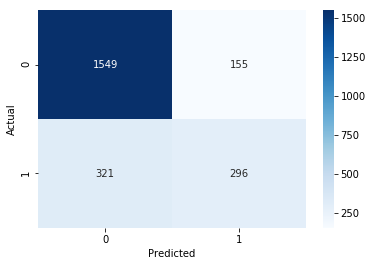

In [34]:
cm(y_pred_rf)

#### ROC-AUC Random Forest Classifier

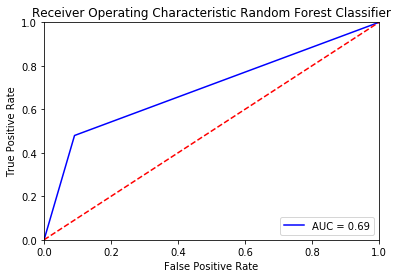

In [46]:
roc_auc(y_pred_rf,'Random Forest Classifier')

### Logistic Regression

In [36]:
lr = LogisticRegression()
print(lr.fit(X_train,y_train))
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.804287836977
0.79707022835


In [37]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(lr, hyperparameters, cv=5, verbose=0)
grid_model = clf.fit(X_train, y_train)

In [39]:
print('Best Penalty:', grid_model.best_estimator_.get_params()['penalty'])
print('Best C:', grid_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.78255940221


In [40]:
print(grid_model.score(X_train,y_train))
print(grid_model.score(X_test,y_test))
y_pred_lr = grid_model.predict(X_test)

0.808320950966
0.800517018526


#### ROC-AUC Curve Logistic Regression

0.592788038698


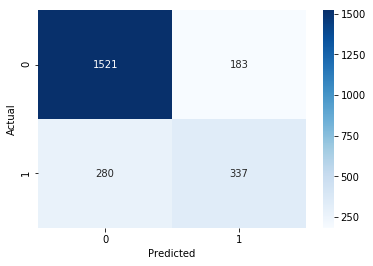

In [41]:
cm(y_pred_lr)

#### ROC-AUC Curve Logistic Regression

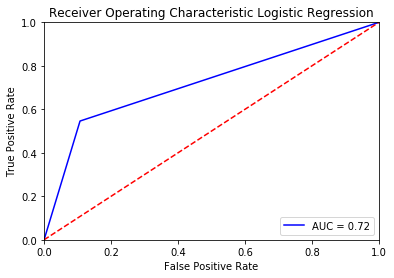

In [47]:
roc_auc(y_pred_lr,'Logistic Regression')